Let's first install requirements

In [1]:
%matplotlib inline

## Initialization of the libraries/variables

In [2]:
import os

import numpy as np
import torch
torch.manual_seed(42*42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

import matplotlib.pyplot as plt
# matplotlib parameters
fig_width = 20
phi = (np.sqrt(5)+1)/2 # golden ratio for the figures :-)

In [3]:
im_shift_X, im_shift_Y = 0, 27
image_size = 256

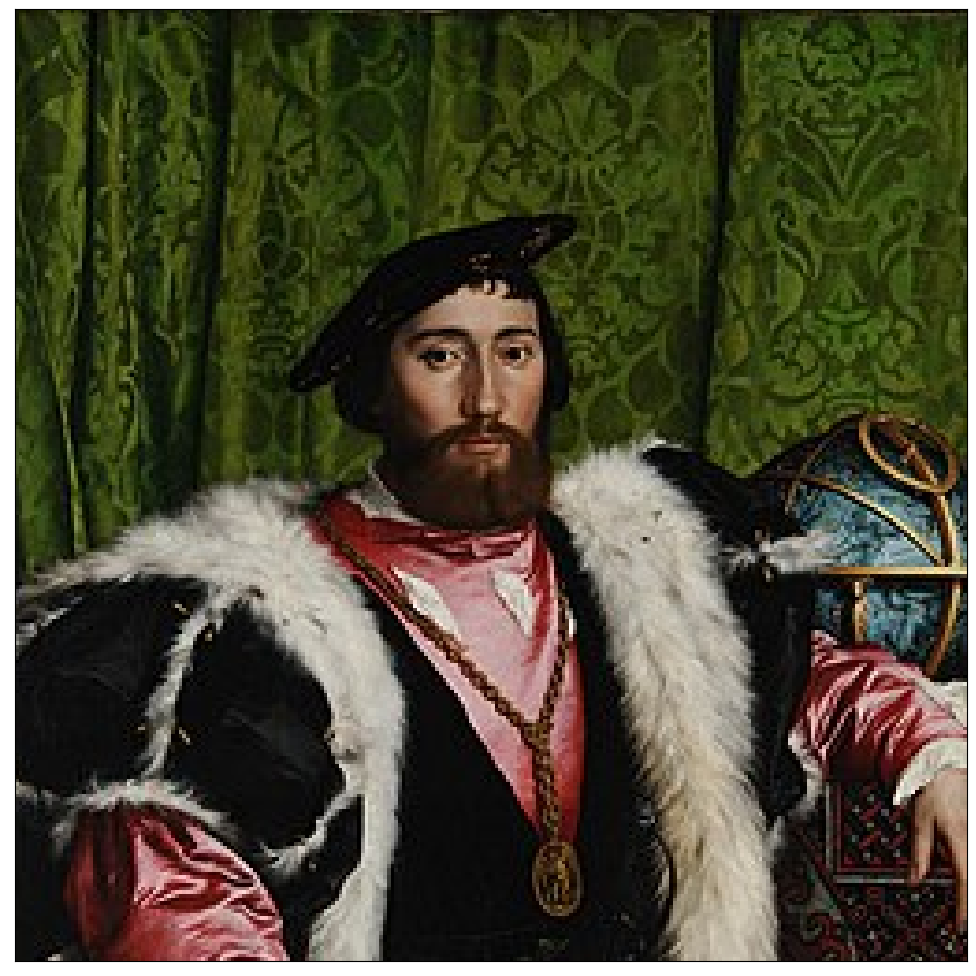

In [4]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg'
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg/608px-Hans_Holbein_the_Younger_-_The_Ambassadors_-_Google_Art_Project.jpg'
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True
# import imageio
import imageio.v2 as imageio

image = imageio.imread(image_url)[im_shift_X:im_shift_X+image_size, im_shift_Y:im_shift_Y+image_size, :]

fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [5]:
image = image.astype(np.double)/255


In [6]:
image = torch.DoubleTensor(torch.from_numpy(image))
image.shape, image.type

(torch.Size([256, 256, 3]), <function Tensor.type>)

In [9]:

rs_ = torch.logspace(0, -4, image_size, base = 2)
ts_ = torch.linspace(0, torch.pi*2, image_size+1)[:-1]

grid_xs = torch.outer(rs_, -torch.cos(ts_)) 
grid_ys = torch.outer(rs_, torch.sin(ts_)) 
grid_xs

tensor([[-1.000, -1.000, -0.999,  ..., -0.997, -0.999, -1.000],
        [-0.989, -0.989, -0.988,  ..., -0.987, -0.988, -0.989],
        [-0.978, -0.978, -0.977,  ..., -0.976, -0.977, -0.978],
        ...,
        [-0.064, -0.064, -0.064,  ..., -0.064, -0.064, -0.064],
        [-0.063, -0.063, -0.063,  ..., -0.063, -0.063, -0.063],
        [-0.062, -0.062, -0.062,  ..., -0.062, -0.062, -0.062]])

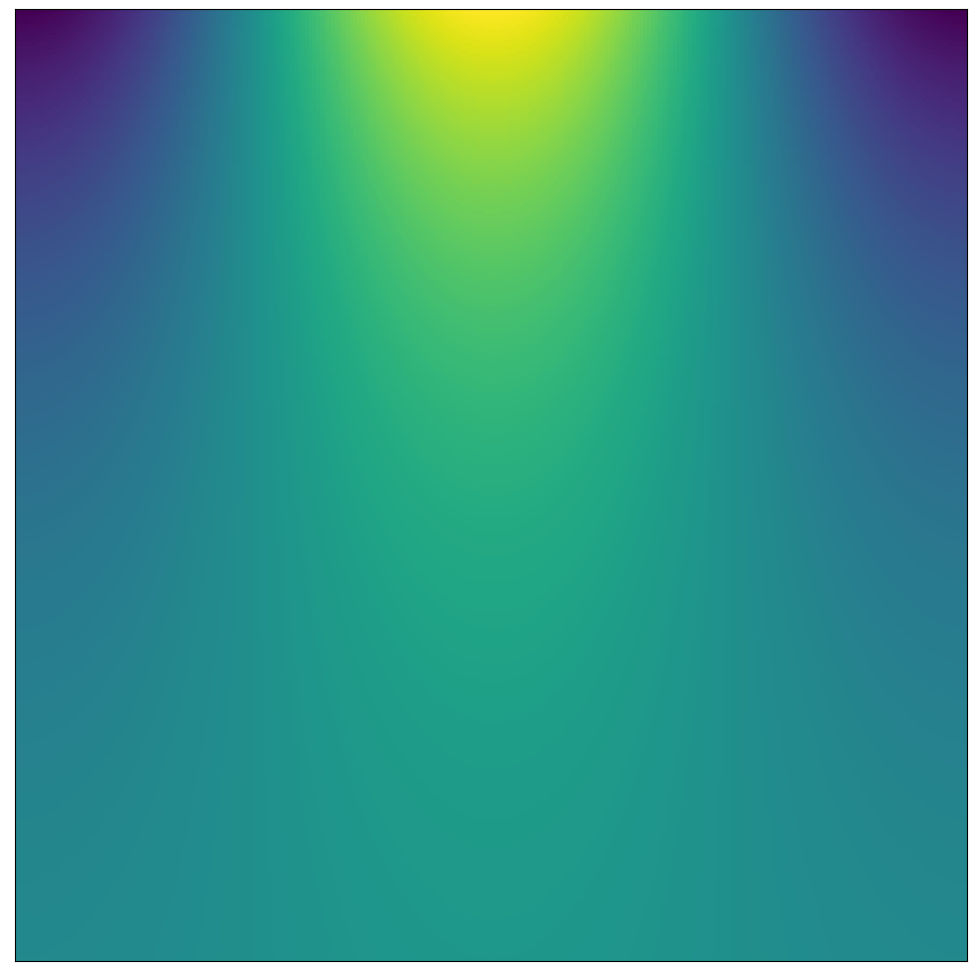

In [11]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(grid_xs)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [18]:

grid_xs = grid_xs.unsqueeze(0).unsqueeze(3)
# grid_xs = Variable(grid_xs, requires_grad=False)
grid_ys = grid_ys.unsqueeze(0).unsqueeze(3)
# grid_ys = Variable(grid_ys, requires_grad=False)


In [23]:
# from torch.autograd import Variable
def expand_dim(tensor, dim, desired_dim_len):
    sz = list(tensor.size())
    sz[dim]=desired_dim_len
    return tensor.expand(tuple(sz))

logPolar_grid = torch.cat((grid_xs, grid_ys), 3)
logPolar_grid = expand_dim(logPolar_grid, 0, 1)
logPolar_grid.shape

torch.Size([1, 256, 256, 2])

In [8]:
logPolar_grid = torch.DoubleTensor(logPolar_grid)

TypeError: expected TensorOptions(dtype=double, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)) (got TensorOptions(dtype=float, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)))

In [20]:
import torch.nn.functional as F

image_ret = F.grid_sample(image.unsqueeze(0).float(), logPolar_grid, align_corners=False).squeeze(0).numpy()
image_ret.shape

(256, 256, 256)

TypeError: Invalid shape (256, 256, 256) for image data

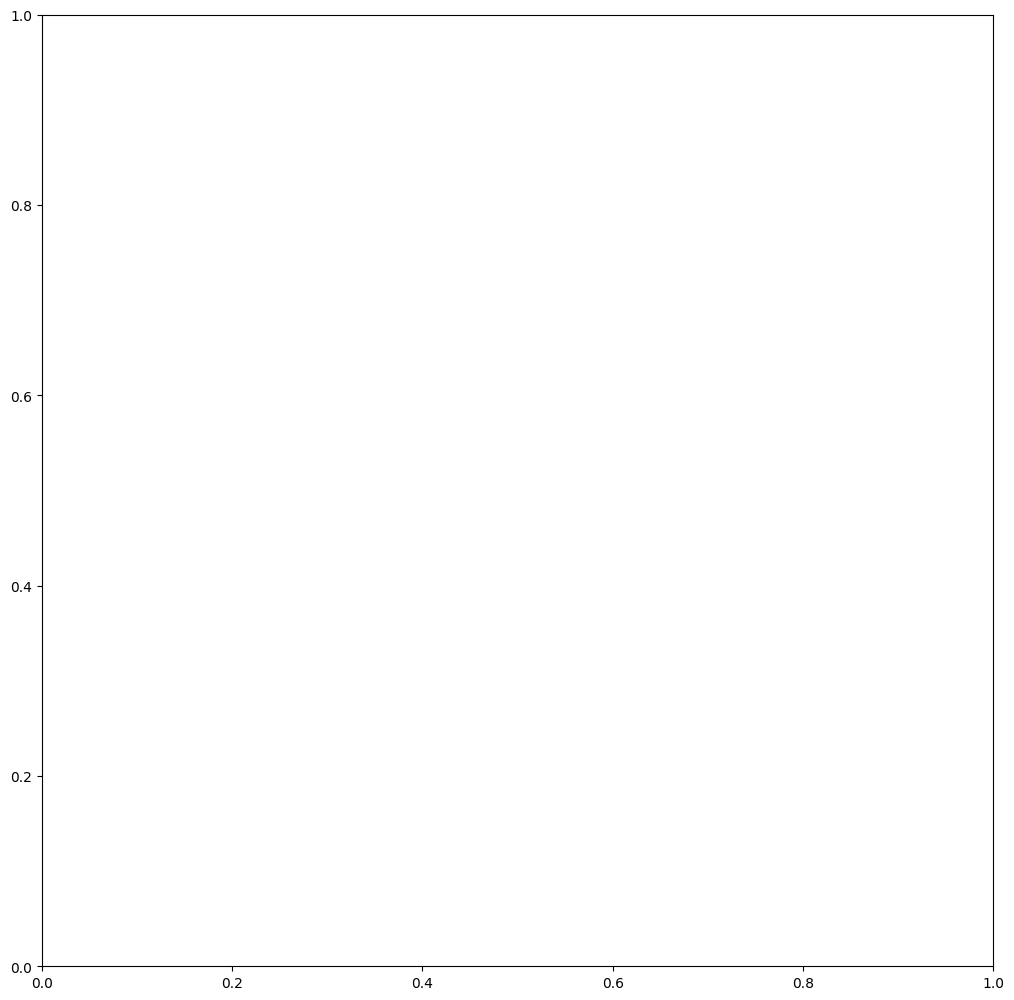

In [21]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi))
ax.imshow(image_ret)
ax.set_xticks([])
ax.set_yticks([])  
fig.set_facecolor(color='white')

In [ ]:
torch.from_numpy?